In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('developer_survey_2020/survey_results_public.csv')
df.shape

(64461, 61)

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df_schema = pd.read_csv('developer_survey_2020/survey_results_schema.csv')
df_schema.shape

(61, 2)

In [5]:
df_schema.head(30)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [6]:
df_schema.tail(31)

,Column,QuestionText
30,NEWJobHunt,"In general, what drives you to look for a new ..."
31,NEWJobHuntResearch,"When job searching, how do you learn more abou..."
32,NEWLearn,How frequently do you learn a new language or ...
33,NEWOffTopic,Do you think Stack Overflow should relax restr...
34,NEWOnboardGood,Do you think your company has a good onboardin...
35,NEWOtherComms,Are you a member of any other online developer...
36,NEWOvertime,How often do you work overtime or beyond the f...
37,NEWPurchaseResearch,"When buying a new tool or software, how do you..."
38,NEWPurpleLink,You search for a coding solution online and th...
39,NEWSOSites,Which of the following Stack Overflow sites ha...


In [7]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

<AxesSubplot:>

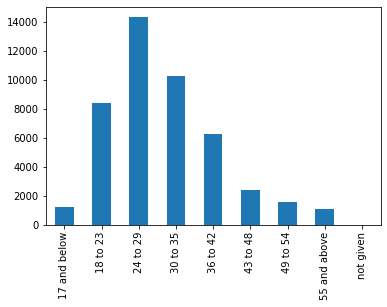

In [8]:
def groupAge(row):
    age = df['Age'][row]
    if np.isnan(age):
        return 'not given'
    elif age <= 17:
        return '17 and below'
    elif age <= 23:
        return '18 to 23'
    elif age <= 29:
        return '24 to 29'
    elif age <= 35:
        return '30 to 35'
    elif age <= 42:
        return '36 to 42'
    elif age <= 48:
        return '43 to 48'
    elif age <= 55:
        return '49 to 54'
    else:
        return '55 and above'

ages = df['Age'].groupby(groupAge).count()
ages.plot(kind='bar')

<AxesSubplot:>

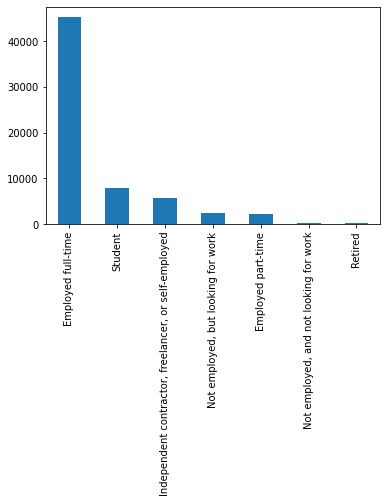

In [9]:
positions = df['Employment'].value_counts()
positions.plot(kind='bar')

In [10]:
df['DevType'].unique().shape

(8270,)

In [11]:
df['DevType'].unique()[:10]

array(['Developer, desktop or enterprise applications;Developer, full-stack',
       'Developer, full-stack;Developer, mobile', nan,
       'Designer;Developer, front-end;Developer, mobile',
       'Developer, back-end;Developer, front-end;Developer, QA or test;DevOps specialist',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Developer, full-stack',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       'Designer;Developer, front-end'], dtype=object)

In [12]:
def get_dev_type_values(dev_type):
    values = set()
    
    first = dev_type.split(', ')
    for item in first:
        second = item.split(';')
        values.update(second)
        
    return values

def get_dev_type_possible_values(series):
    series = series.dropna()
    
    values = set()
    for value in series:
        item_values = get_dev_type_values(value)
        values.update(item_values)
        
    return values

In [13]:
dev_types = get_dev_type_possible_values(df['DevType'])
dev_types

{'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer',
 'Educator',
 'Engineer',
 'Engineering manager',
 'Marketing or sales professional',
 'Product manager',
 'QA or test',
 'Scientist',
 'Senior executive/VP',
 'System administrator',
 'back-end',
 'data',
 'desktop or enterprise applications',
 'embedded applications or devices',
 'front-end',
 'full-stack',
 'game or graphics',
 'mobile',
 'site reliability'}

In [14]:
def create_dev_type_df(series, dev_types):
    df = pd.DataFrame()
    
    for dev_type in dev_types:

        def is_dev_type(row):
            try:
                return 1 if dev_type in row else 0
            except:
                return 0

        dev_type_series = series.apply(is_dev_type)
        
        df[dev_type] = dev_type_series
    
    return df

In [15]:
dev_type_df = create_dev_type_df(df['DevType'], dev_types)
dev_type_df.shape

(64461, 25)

In [16]:
dev_type_df.head()

,Developer,Database administrator,Senior executive/VP,Data or business analyst,Engineering manager,Designer,embedded applications or devices,System administrator,Educator,site reliability,...,Product manager,QA or test,Marketing or sales professional,Scientist,full-stack,Engineer,data,Academic researcher,Data scientist or machine learning specialist,front-end
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dev_type_counts = dev_type_df[dev_type_df == 1].count()
dev_type_counts

Developer                                        45125
Database administrator                            5722
Senior executive/VP                               1320
Data or business analyst                          4024
Engineering manager                               2724
Designer                                          5321
embedded applications or devices                  4750
System administrator                              5242
Educator                                          2928
site reliability                                  1940
back-end                                         27228
mobile                                            9482
game or graphics                                  2789
desktop or enterprise applications               11784
DevOps specialist                                 5969
Product manager                                   2497
QA or test                                        3947
Marketing or sales professional                    642
Scientist 

<AxesSubplot:>

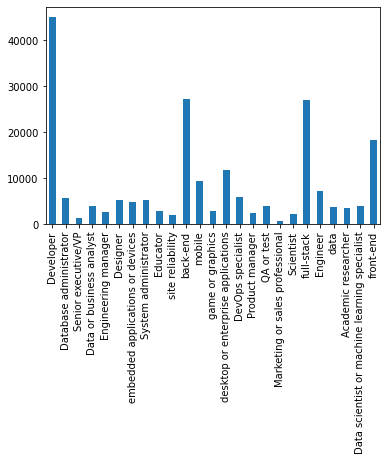

In [18]:
dev_type_counts.plot(kind='bar')

<AxesSubplot:>

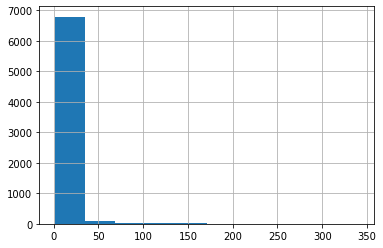

In [19]:
df['ConvertedComp'].value_counts().hist()

In [27]:
def clean_data(df, dev_type_df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    
    
    # only include columns of interest
    hobbyist_sr = df['Hobbyist'].apply(lambda row : 1 if row == 'Yes' else 0)
    employment_dummies = df['Employment'].str.get_dummies()
    
    df = pd.concat([df['ConvertedComp'], df['Age'], hobbyist_sr, employment_dummies, dev_type_df], axis=1)
    
    df = df.dropna(subset=['ConvertedComp'])
    
    X = df.drop(columns=['ConvertedComp'])
    y = df['ConvertedComp']
    
    return X, y

In [28]:
#Use the function to create X and y
X, y = clean_data(df, dev_type_df)
X.shape, y.shape

((34756, 34), (34756,))

In [29]:
X.head()

,Age,Hobbyist,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, and not looking for work","Not employed, but looking for work",Retired,Student,Developer,...,Product manager,QA or test,Marketing or sales professional,Scientist,full-stack,Engineer,data,Academic researcher,Data scientist or machine learning specialist,front-end
7,36.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,22.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
10,23.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11,49.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12,53.0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.count()

Age                                                     30596
Hobbyist                                                34756
Employed full-time                                      34756
Employed part-time                                      34756
Independent contractor, freelancer, or self-employed    34756
Not employed, and not looking for work                  34756
Not employed, but looking for work                      34756
Retired                                                 34756
Student                                                 34756
Developer                                               34756
Database administrator                                  34756
Senior executive/VP                                     34756
Data or business analyst                                34756
Engineering manager                                     34756
Designer                                                34756
embedded applications or devices                        34756
System a

In [44]:
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # to prevent data leakage, setting the mean of the age here.
    X_train_mean = X_train['Age'].mean()
    X_test_mean = X_test['Age'].mean()
    X_train['Age'] = X_train['Age'].fillna(value=X_train_mean)
    X_test['Age'] = X_test['Age'].fillna(value=X_test_mean)
    
    return X_train, X_test, y_train, y_test

In [45]:
X_train, X_test, y_train, y_test = split(X, y)

<ipython-input-44-beedb064fbf6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = X_train['Age'].fillna(value=X_train_mean)
<ipython-input-44-beedb064fbf6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = X_test['Age'].fillna(value=X_test_mean)


In [41]:
X_train['Age'].count()

26067

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict using model
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

# Score using model
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test, y_test_preds)

test_score, train_score

(0.01966702564306755, 0.018930123103245378)

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error